In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy
from typing import List, Tuple, Dict

**For this assignment only**

If you want to use NetworkX with your assignment, you can do:

```
conda install networkx
```
or

```
pip install networkx
```

Additionally, this assignment uses a recursive algorithm. You should use `deecopy` at the appropriate places to avoid entanglement issues.

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [2]:
connecticut = {
    "nodes": [
        "Fairfield",
        "Litchfield",
        "New Haven",
        "Hartford",
        "Middlesex",
        "Tolland",
        "New London",
        "Windham",
    ],
    "edges": [
        (0, 1),
        (0, 2),
        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),
        (3, 5),
        (3, 6),
        (4, 6),
        (5, 6),
        (5, 7),
        (6, 7),
    ],
    "coordinates": [
        (46, 52),
        (65, 142),
        (104, 77),
        (123, 142),
        (147, 85),
        (162, 140),
        (197, 94),
        (217, 146),
    ],
}
print(connecticut)


{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

**If you are using NetworkX in your assignment, you can copy this function into module03.py**

In [3]:
def draw_map(name, planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct

    G = nx.Graph()

    labels = as_dictionary(planar_map["nodes"])
    pos = as_dictionary(planar_map["coordinates"])

    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map["nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ["red" for c in range(0, len(planar_map["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(planar_map["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(name)
    nx.draw(G, node_color=colors, with_labels=True, labels=labels, pos=pos)


#    plt.savefig(name + ".png")

Using this function, we can draw `connecticut`:

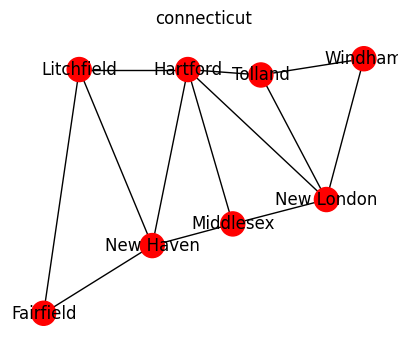

In [4]:
draw_map("connecticut", connecticut, (5, 4), [(n, "red") for n in connecticut["nodes"]])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**. You can roll your own from Depth First Search or use the pseudocode for `backtracking_search` on p. 192 of AIAMA 4th Edition.

You will also need to implement one of the following heuristics: **Minimum Remaining Values** or **Degree Heuristic** (tell me which one; it doesn't make sense to implement both) as well as **Least Constraining Value**. Break ties in ascending order (least to most).

You should get the backtracking and forward checking implemented first. Then add the heuristics. You can use the pseudocode in the book and then stub out the functions that implement the "pick a variable" heuristic and the "pick a value" heuristic. When you get it working, fill in the appropriate heuristic mentioned above.

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: yes
    forward checking: yes
    minimum remaining values: Yes
    degree heuristic: No
    least contraining value: yes

Your function should take the following form:

```python
def color_map( planar_map, color_list, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

<a id="color_map"></a>
### color_map

`color_map` driver function to color a planar map with constraints. **Uses**: [backtrack](#backtrack)

* **planar_map** Dict: the map containing nodes and constraint edges
* **color_list** List[str]: the list of acceptable colors to use
* **trace** Boolean: tells trace to print statements or not to print them

**return**: List[Tuple]: the list of assignments generated by the algorithm

In [5]:
def color_map(planar_map: Dict, color_list: List[str], trace=False) -> List[Tuple]:
    sorted_colored_map = []
    colored_map = backtrack(planar_map, color_list, [], trace)
    if colored_map == "fail":
        return None
    for n in planar_map["nodes"]:
        for a, b in colored_map:
            if n == a:
                sorted_colored_map.append((a, b))
    return sorted_colored_map

<a id="backtrack"></a>
### backtrack

`backtrack` traces through a planar map and assignes colors to nodes based on dependencies in the map. Assignments are made in a depth first search approach and if the coloring can't continue before it is finished the program backtracks to see if a different coloring method will work to complete the map. **Used by**: [color_map](#color_map), **Uses**: [select_unassigned_variable](#select_unassigned_variable), [order_domain_values](#order_domain_values), [inference](#inference)

* **_planar_map** Dict: the map containing nodes and constraint edges
* **color_list** List[str]: the list of acceptable colors to use
* **_assignment** List[Tuple]: the list of color assignments
* **trace** Boolean: tells trace to print statements or not to print them

**return**: List[Tuple]: the list of assignments generated by the algorithm

In [6]:
def backtrack(
    _planar_map: Dict, color_list: List[str], _assignment: List[Tuple], trace
) -> List[Tuple]:
    assignment = deepcopy(_assignment)
    planar_map = deepcopy(_planar_map)
    if len(assignment) == len(planar_map["nodes"]):
        return assignment
    var = select_unassigned_variable(planar_map, color_list, assignment)
    for value in order_domain_values(planar_map, var, color_list, assignment):
        assignment.append((var, value))
        inferences = inference(planar_map, var, value, color_list, assignment)
        if inferences != "fail":
            map_copy = deepcopy(planar_map)
            planar_map.update(inferences)
            result = backtrack(planar_map, color_list, assignment, trace)
            if result != "fail":
                return result
            planar_map = map_copy
            if trace:
                print(f"backtrack due to value assignment fail for {var}")
        assignment.pop()
        if trace:
            print(f"backtrack due to forward checking constraint at {var}")
    return "fail"


<a id="select_unassigned_variable"></a>
### select_unassigned_variable

`select_unassigned_variable` selects which variable/node to assign a color to next. Uses minimum remaining values to speed up the selection process. **Used by**: [backtrack](#backtrack)

* **planar_map** Dict: the map containing nodes and constraint edges
* **color_list** List[str]: the list of acceptable colors to use
* **assignment** List[Tuple]: the list of color assignments

**return**: str: variable to assign a color to

In [7]:
def select_unassigned_variable(
    planar_map: Dict, color_list: List[str], assignment: List[Tuple]
) -> str:
    variable = []
    assigned = []
    nodes = planar_map["nodes"]
    var_len = len(color_list)
    for p, c in assignment:
        assigned.append(p)
    for n in nodes:
        if n not in assigned:
            variable = n
            break
    for n in nodes:
        if n in planar_map.keys() and n not in assigned:
            if variable in planar_map.keys():
                if len(planar_map[n]) > var_len:
                    variable = n
                    var_len = len(planar_map[n])
                if len(planar_map[n]) > len(planar_map[variable]):
                    variable = n
    return variable


<a id="order_domain_values"></a>
### order_domain_values

`order_domain_values` determines the order to try the potential colors for a node. Uses least constraining values to determine order of values. **Used by**: [backtrack](#backtrack)

* **planar_map** Dict: the map containing nodes and constraint edges
* **color_list** List[str]: the list of acceptable colors to use
* **assignment** List[Tuple]: the list of color assignments


**return**: List[str]: the list colors to try

In [8]:
def order_domain_values(
    planar_map: Dict, var: str, color_list: List[str], assignment: List[Tuple]
) -> List[str]:
    values = []
    forbidden = []
    _values = []
    result = []
    planar_map["nodes"]

    if var in planar_map.keys():
        forbidden = planar_map[var]
    for i in color_list:
        if i not in forbidden:
            values.append(i)
    assigned = assigned_list(planar_map, var, assignment)
    color_count = count_colors(planar_map, color_list, assigned)
    for i, c in enumerate(color_count):
        _values.append((c, color_list[i]))
    sorted(_values)
    for a, b in _values:
        if b in values:
            result.append(b)
    return result


<a id="count_colors"></a>
### count_colors

`count_colors` counts the colors used by adjacent nodes to determine the least constraining value. **Used by**: [order_domain_values](#order_domain_values)

* **planar_map** Dict: the map containing nodes and constraint edges
* **color_list** List[str]: the list of acceptable colors to use
* **assigned** List[int]: the list of color assignments


**return**: List[int]: the count of colors

In [9]:
def count_colors(
    planar_map: Dict, color_list: List[str], assigned: List[int]
) -> List[int]:
    colors = []
    a_nodes = []
    nodes = planar_map["nodes"]
    for n in color_list:
        colors.append(0)
    for n in assigned:
        a_nodes.append(nodes[n])
    for n in a_nodes:
        if n in planar_map.keys():
            for i, c in enumerate(color_list):
                if c in planar_map[n]:
                    colors[i] += 1
    return colors


<a id="inference"></a>
### inference

`inference` runs the forward checking to determine if future variables will be able to be assigned. **Used by**: [backtrack](#backtrack) **Uses**:[assigned_list](#assigned_list)

* **planar_map** Dict: the map containing nodes and constraint edges
* **var** str: the variable being evaluated for color selection
* **value** str: the value assigned to the variable
* **color_list** List[str]: the list of acceptable colors to use
* **assignment** List[Tuple]: the list of color assignments


**return**: List[str]: the list colors to try

In [10]:
def inference(
    planar_map: Dict,
    var: str,
    value: str,
    color_list: List[str],
    assignment: List[Tuple],
) -> List[str]:
    result = {}
    nodes = planar_map["nodes"]
    inferences = assigned_list(planar_map, var, assignment)
    for end in inferences:
        existing_inferences = []
        if nodes[end] in planar_map.keys():
            existing_inferences = planar_map[nodes[end]]
        if value not in existing_inferences:
            existing_inferences.append(value)
        if len(existing_inferences) == len(color_list):
            result = "fail"
            return result
        result[nodes[end]] = existing_inferences
    return result


<a id="assigned_list"></a>
### assigned_list

`assigned_list` returns the nodes related to the assigned node. **Used by**: [inference](#inference)

* **planar_map** Dict: the map containing nodes and constraint edges
* **var** str: the variable being evaluated for color selection
* **assignment** List[Tuple]: the list of color assignments


**return**: List[str]: the list nodes related to the target node by dependency

In [11]:
def assigned_list(planar_map: Dict, var: str, assignment: List[Tuple]) -> List[str]:
    inferences = []
    assigned = []
    nodes = planar_map["nodes"]
    for p, c in assignment:
        assigned.append(p)
    for i, s in enumerate(nodes):
        if s == var:
            start = i
    for i, end in planar_map["edges"]:
        if i == start:
            if nodes[end] not in assigned:
                inferences.append(end)
        if end == start:
            if nodes[i] not in assigned:
                inferences.append(i)
    return inferences

## Problem 1. Color Connecticut Using Your Solution

In [12]:
connecticut_colors = color_map(
    connecticut, ["red", "blue", "green", "yellow"], trace=True
)


Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [13]:
edges = connecticut["edges"]
nodes = connecticut["nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

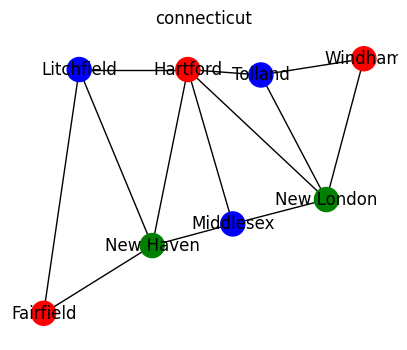

In [14]:
draw_map("connecticut", connecticut, (5, 4), connecticut_colors)

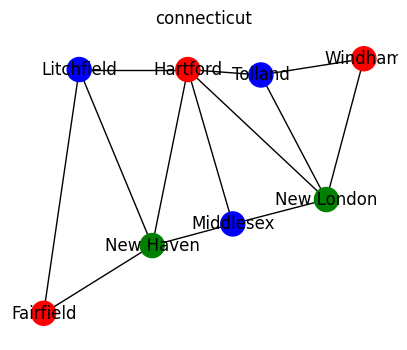

In [15]:
connecticut_colors = color_map(connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map("connecticut", connecticut, (5, 4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [16]:
europe = {
    "nodes": [
        "Iceland",
        "Ireland",
        "United Kingdom",
        "Portugal",
        "Spain",
        "France",
        "Belgium",
        "Netherlands",
        "Luxembourg",
        "Germany",
        "Denmark",
        "Norway",
        "Sweden",
        "Finland",
        "Estonia",
        "Latvia",
        "Lithuania",
        "Poland",
        "Czech Republic",
        "Austria",
        "Liechtenstein",
        "Switzerland",
        "Italy",
        "Malta",
        "Greece",
        "Albania",
        "Macedonia",
        "Kosovo",
        "Montenegro",
        "Bosnia Herzegovina",
        "Serbia",
        "Croatia",
        "Slovenia",
        "Hungary",
        "Slovakia",
        "Belarus",
        "Ukraine",
        "Moldova",
        "Romania",
        "Bulgaria",
        "Cyprus",
        "Turkey",
        "Georgia",
        "Armenia",
        "Azerbaijan",
        "Russia",
    ],
    "edges": [
        (0, 1),
        (0, 2),
        (1, 2),
        (2, 5),
        (2, 6),
        (2, 7),
        (2, 11),
        (3, 4),
        (4, 5),
        (4, 22),
        (5, 6),
        (5, 8),
        (5, 9),
        (5, 21),
        (5, 22),
        (6, 7),
        (6, 8),
        (6, 9),
        (7, 9),
        (8, 9),
        (9, 10),
        (9, 12),
        (9, 17),
        (9, 18),
        (9, 19),
        (9, 21),
        (10, 11),
        (10, 12),
        (10, 17),
        (11, 12),
        (11, 13),
        (11, 45),
        (12, 13),
        (12, 14),
        (12, 15),
        (12, 17),
        (13, 14),
        (13, 45),
        (14, 15),
        (14, 45),
        (15, 16),
        (15, 35),
        (15, 45),
        (16, 17),
        (16, 35),
        (17, 18),
        (17, 34),
        (17, 35),
        (17, 36),
        (18, 19),
        (18, 34),
        (19, 20),
        (19, 21),
        (19, 22),
        (19, 32),
        (19, 33),
        (19, 34),
        (20, 21),
        (21, 22),
        (22, 23),
        (22, 24),
        (22, 25),
        (22, 28),
        (22, 29),
        (22, 31),
        (22, 32),
        (24, 25),
        (24, 26),
        (24, 39),
        (24, 40),
        (24, 41),
        (25, 26),
        (25, 27),
        (25, 28),
        (26, 27),
        (26, 30),
        (26, 39),
        (27, 28),
        (27, 30),
        (28, 29),
        (28, 30),
        (29, 30),
        (29, 31),
        (30, 31),
        (30, 33),
        (30, 38),
        (30, 39),
        (31, 32),
        (31, 33),
        (32, 33),
        (33, 34),
        (33, 36),
        (33, 38),
        (34, 36),
        (35, 36),
        (35, 45),
        (36, 37),
        (36, 38),
        (36, 45),
        (37, 38),
        (38, 39),
        (39, 41),
        (40, 41),
        (41, 42),
        (41, 43),
        (41, 44),
        (42, 43),
        (42, 44),
        (42, 45),
        (43, 44),
        (44, 45),
    ],
    "coordinates": [
        (18, 147),
        (48, 83),
        (64, 90),
        (47, 28),
        (63, 34),
        (78, 55),
        (82, 74),
        (84, 80),
        (82, 69),
        (100, 78),
        (94, 97),
        (110, 162),
        (116, 144),
        (143, 149),
        (140, 111),
        (137, 102),
        (136, 95),
        (122, 78),
        (110, 67),
        (112, 60),
        (98, 59),
        (93, 55),
        (102, 35),
        (108, 14),
        (130, 22),
        (125, 32),
        (128, 37),
        (127, 40),
        (122, 42),
        (118, 47),
        (127, 48),
        (116, 53),
        (111, 54),
        (122, 57),
        (124, 65),
        (146, 87),
        (158, 65),
        (148, 57),
        (138, 54),
        (137, 41),
        (160, 13),
        (168, 29),
        (189, 39),
        (194, 32),
        (202, 33),
        (191, 118),
    ],
}
print(europe)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [17]:
europe_colors = color_map(europe, ["red", "blue", "green", "yellow"], trace=True)

backtrack due to forward checking constraint at Kosovo
backtrack due to value assignment fail for Macedonia
backtrack due to forward checking constraint at Macedonia
backtrack due to forward checking constraint at Macedonia
backtrack due to value assignment fail for Greece
backtrack due to forward checking constraint at Greece
backtrack due to forward checking constraint at Kosovo
backtrack due to value assignment fail for Macedonia
backtrack due to forward checking constraint at Macedonia
backtrack due to value assignment fail for Greece
backtrack due to forward checking constraint at Greece
backtrack due to value assignment fail for Albania
backtrack due to forward checking constraint at Albania


Here we're testing to see if the adjacent nodes are colored differently:

In [18]:
edges = europe["edges"]
nodes = europe["nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[start][COLOR] != colors[end][COLOR]
    except AssertionError:
        print(
            f"{nodes[start]} and {nodes[end]} are adjacent but have the same color {colors[end][COLOR]}."
        )

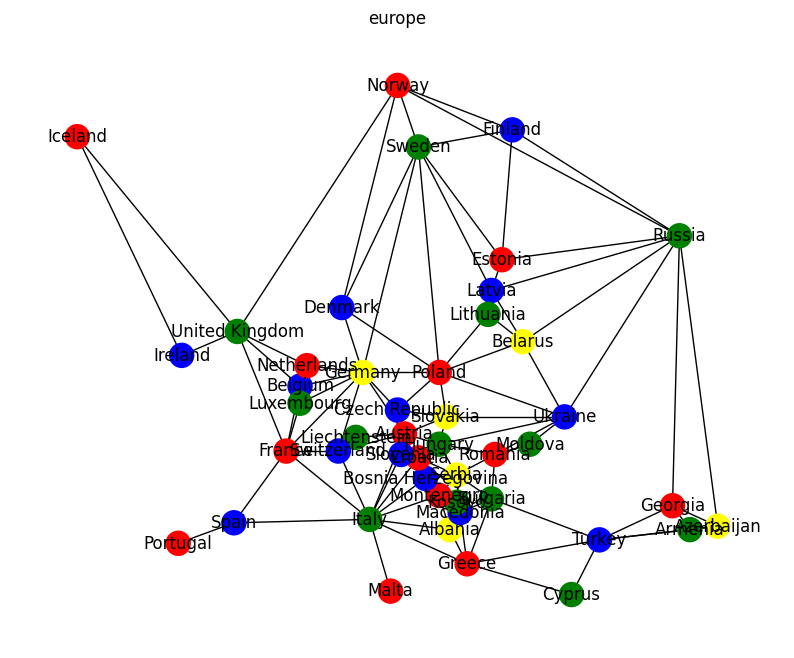

In [19]:
draw_map("europe", europe, (10, 8), europe_colors)

In [20]:
europe_colors = color_map(europe, ["red", "blue", "green"], trace=True)
if europe_colors:
    draw_map("europe", europe, (10, 8), europe_colors)

backtrack due to forward checking constraint at Luxembourg
backtrack due to value assignment fail for Netherlands
backtrack due to forward checking constraint at Netherlands
backtrack due to value assignment fail for Belgium
backtrack due to forward checking constraint at Belgium
backtrack due to value assignment fail for France
backtrack due to forward checking constraint at France
backtrack due to value assignment fail for Spain
backtrack due to forward checking constraint at Spain
backtrack due to forward checking constraint at Luxembourg
backtrack due to value assignment fail for Netherlands
backtrack due to forward checking constraint at Netherlands
backtrack due to value assignment fail for Belgium
backtrack due to forward checking constraint at Belgium
backtrack due to value assignment fail for France
backtrack due to forward checking constraint at France
backtrack due to value assignment fail for Spain
backtrack due to forward checking constraint at Spain
backtrack due to value